<a href="https://colab.research.google.com/github/Vetyugov/ML/blob/master/linearRegression/%D0%9A%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D1%8F_%D0%B8_%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1
Ответьте на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью? Для ответа выполните следующие шаги:

Постройте точечный график.

Рассчитайте коэффициенты корреляции Пирсона и Спирмена.

Постройте модель линейной регрессии.

Рассчитайте коэффициент детерминации.

Выведите график остатков.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [7]:
df = pd.read_csv('water.csv')
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [9]:
df['location'] = df['location'].astype('category')
df['town'] = df['town'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  61 non-null     int64   
 1   location    61 non-null     category
 2   town        61 non-null     category
 3   mortality   61 non-null     int64   
 4   hardness    61 non-null     int64   
dtypes: category(2), int64(3)
memory usage: 4.3 KB


коэф. корреляции Пирсона            hardness  mortality
hardness   1.000000  -0.654849
mortality -0.654849   1.000000
коэф. корреляции Спирмана            hardness  mortality
hardness   1.000000  -0.631665
mortality -0.631665   1.000000
coef_ =  [-3.13167087]
intercept_ =  1668.9722977277095
determination_coef = 0.5046490611017092
                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     26.31
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           7.83e-06
Time:                        16:16:56   Log-Likelihood:                -269.10
No. Observations:                  42   AIC:                             542.2
Df Residuals:                      40   BIC:                             545.7
Df Model:                          

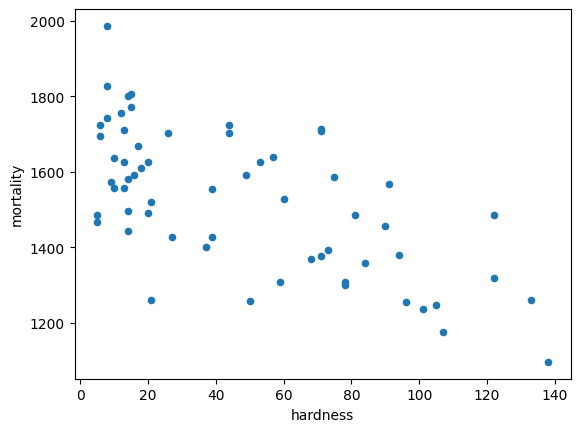

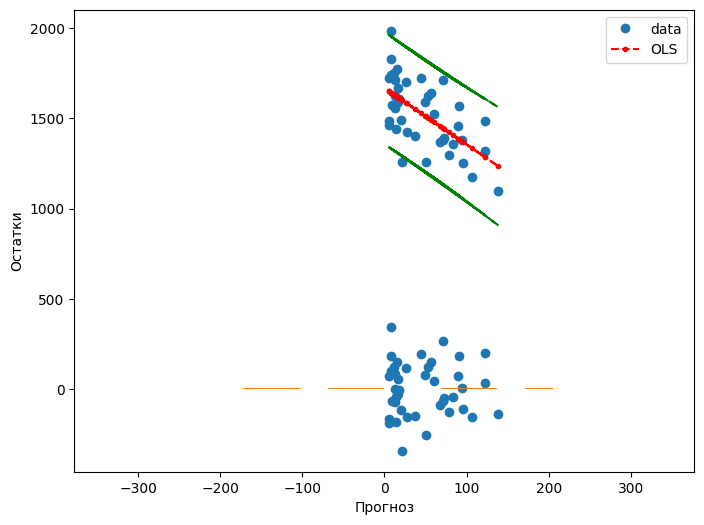

In [41]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

def analize(df_to_analize):
    # визуализируем взаимосвязь преступности и цены дома
  df_to_analize.plot(kind='scatter', x='hardness', y='mortality')
  # считаем коэф. корреляции Пирсона
  koef_pir = df_to_analize[['hardness', 'mortality']].corr()
  print(f'коэф. корреляции Пирсона {koef_pir}')
  # считаем коэф. корреляции Спирмана
  koef_spir = df_to_analize[['hardness', 'mortality']].corr(method='spearman')
  print(f'коэф. корреляции Спирмана {koef_spir}')

  X = df_to_analize[['hardness']]
  y = df_to_analize['mortality']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

  model = LinearRegression()
  model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

  print(f'coef_ =  {model.coef_}')
  print(f'intercept_ =  {model.intercept_}')
  y_pred = model.predict(X_test)
  determination_coef = model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации
  print(f'determination_coef = {determination_coef}')


  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
  X_const = sm.add_constant(X_train) # техническая особенность библиотеки, надо руками добавить константу
  model = sm.OLS(y_train, X_const)
  results = model.fit()
  print(results.summary())
  print('Parameters: ', results.params)
  print('R2: ', results.rsquared)

  prstd, iv_l, iv_u = wls_prediction_std(results)
  # для каждой точки получаем не просто сам прогноз, но и доверительный интервал
  # с увеличением количества факторов, этот интервал будет уменьшаться
  fig, ax = plt.subplots(figsize=(8,6))

  ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
  ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
  ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
  ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
  ax.legend(loc='best')

  # посмотрим на остатки
  plt.scatter(x=X_const.iloc[:, 1], y=results.resid)
  plt.xlabel('Прогноз')
  plt.ylabel('Остатки')

  plt.hist(results.resid, bins=20)

# Ответ к заданию 1: Существует линейная зависимость междую жеткостью воды и продолжительностью жизни

# Задание 2
Ответьте на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности? Для ответ выполните следующие шаги:

Разделите данные на 2 группы.

Повторите аналогичные шаги из пункта 1 для каждой группы по отдельности.

коэф. корреляции Пирсона            hardness  mortality
hardness   1.000000  -0.368598
mortality -0.368598   1.000000
коэф. корреляции Спирмана            hardness  mortality
hardness   1.000000  -0.404208
mortality -0.404208   1.000000
coef_ =  [-1.97686226]
intercept_ =  1688.150229031281
determination_coef = 0.018885304285745863
                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     5.269
Date:                Thu, 23 Nov 2023   Prob (F-statistic):             0.0316
Time:                        16:22:47   Log-Likelihood:                -147.20
No. Observations:                  24   AIC:                             298.4
Df Residuals:                      22   BIC:                             300.7
Df Model:                         

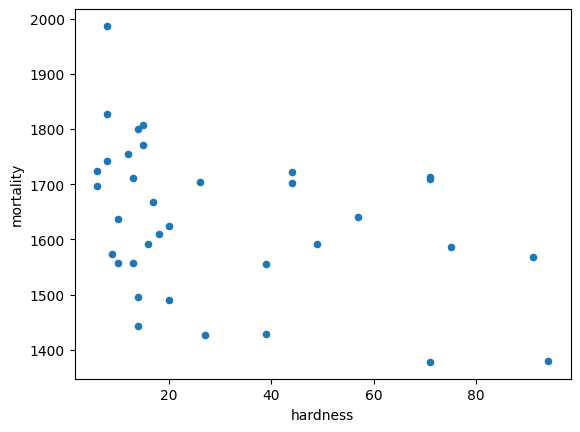

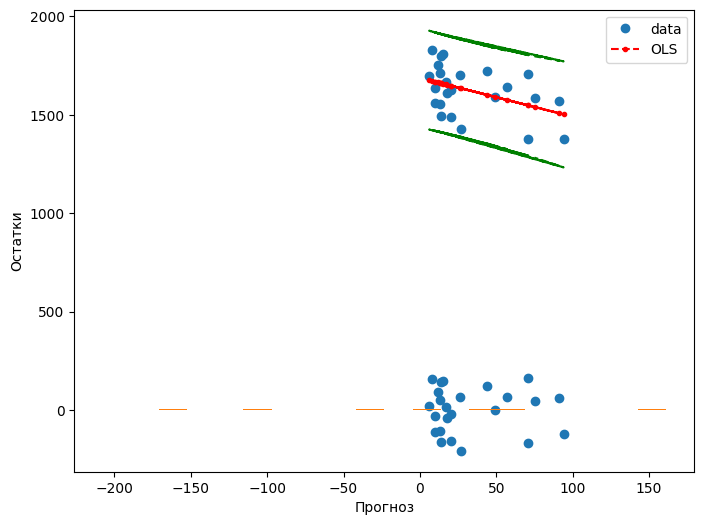

In [44]:
df_North = df[df['location'] == 'North']
analize(df_North)

коэф. корреляции Пирсона            hardness  mortality
hardness   1.000000  -0.602153
mortality -0.602153   1.000000
коэф. корреляции Спирмана            hardness  mortality
hardness   1.000000  -0.595723
mortality -0.595723   1.000000
coef_ =  [-3.51342921]
intercept_ =  1640.2204603423374
determination_coef = -2.5519223012352077
                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     28.00
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           7.30e-05
Time:                        16:22:40   Log-Likelihood:                -106.97
No. Observations:                  18   AIC:                             217.9
Df Residuals:                      16   BIC:                             219.7
Df Model:                         

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


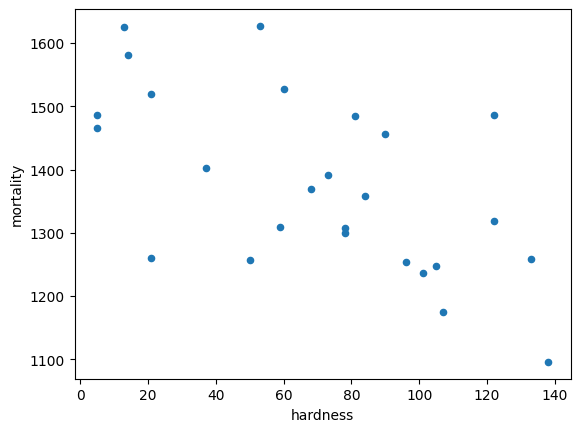

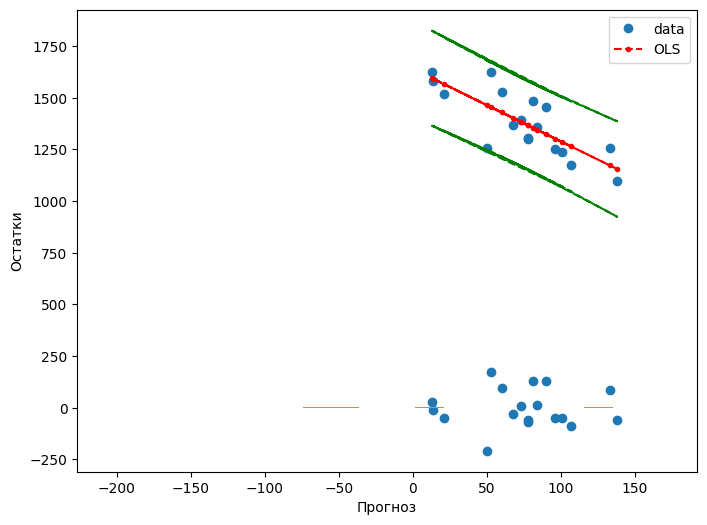

In [43]:
df_South = df[df['location'] == 'South']
analize(df_South)

# Ответ к заданию 2: Существует линейная зависимость междую жеткостью воды и продолжительностью жизни как для серверных, так и для южных городов
При чем для южных городов жта зависимость более выражена